# 03. EDA 

This notebook will use a count vectorizer to check the most common words in single, double, and triple pairs. It excludes words that were only used once. It also looks at the differences in most common words if tweets shorter than 20 characters are excluded. Spoiler: There don't seem to be any differences.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [5]:
df = pd.read_csv('../data/3000_tweets.csv')
df.head()

,no_rts,retweet
0,that would be sign of an inexperienced inves...,0
1,although the market reset is healthy and good ...,0
2,i'd love to see what % of seed-stage investors...,0
3,"when thinking about valuations, anchoring on 2...",0
4,"why there are still like 23,000 different form...",0


In [6]:
df.shape

(35999, 2)

In [7]:
df.isnull().sum()

no_rts     273
retweet      0
dtype: int64

The rows that are null are likely tweets that were just tagging someone and/or tweeting a URL, which were both removed in the last notebook. It's an insignificant number.

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.isnull().sum()

no_rts     0
retweet    0
dtype: int64

In [10]:
df['no_rts'] = df['no_rts'].str.lower()

In [11]:
text = df['no_rts']

In [12]:
text

0          that would be sign of an inexperienced inves...
1        although the market reset is healthy and good ...
2        i'd love to see what % of seed-stage investors...
3        when thinking about valuations, anchoring on 2...
4        why there are still like 23,000 different form...
                               ...                        
35994      gerald, we need to chat about rarebreed fund ii
35995    don’t think  needs any amplifying but i’ve inv...
35996     the quick version is we do 40-50 first checks...
35997    a good thread for emerging managers in my netw...
35998    the wealth of knowledge that is consistently s...
Name: no_rts, Length: 35726, dtype: object

In [13]:
# save text without quotes
#text = np.savetxt('./data/text.txt', text.values, fmt = "%s")

In [14]:
df['retweet'].value_counts(normalize=True)

0    0.770363
1    0.229637
Name: retweet, dtype: float64

The sample of ~36,000 tweets is split about 77/23 into original tweets and retweets. 

In [15]:
df['no_rts'].str.len().value_counts().sort_values()

294      1
293      2
295      2
291      5
292      7
      ... 
123    415
125    423
124    430
122    444
1      510
Name: no_rts, Length: 295, dtype: int64

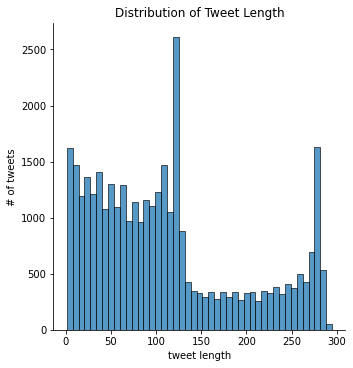

In [16]:
# I want to remove any tweets that are less than 20 characters

sns.displot(df['no_rts'].str.len());
plt.xlabel('tweet length')
plt.ylabel('# of tweets')
plt.title('Distribution of Tweet Length');

In [34]:
df[df['no_rts'].str.len() < 20].head(10)

,no_rts,retweet
13,done,0
44,ok,0
46,so terrible,0
53,🙏🏽,0
65,celebrating 47!,0
72,,1
99,these are net,0
100,paywall,0
101,inst,0
110,sorry meant 500b,0


In [19]:
long_tweets = df[df['no_rts'].str.len() > 20]

In [21]:
long_text = long_tweets['no_rts']
long_text.head(2)

0      that would be sign of an inexperienced inves...
1    although the market reset is healthy and good ...
Name: no_rts, dtype: object

In [31]:
text.shape, long_text.shape

((35726,), (31445,))

In [35]:
# save long_text without quotes
#long_text = np.savetxt('../data/long_text.txt', text.values, fmt = "%s")

### Count Vectorizer Strategy 1

-----

This first run will look at the top 20 most used single words across the tweets. 

In [59]:
cv = CountVectorizer(stop_words='english', strip_accents='ascii', min_df=2)
cv.fit(text)

CountVectorizer(min_df=2, stop_words='english', strip_accents='ascii')

In [60]:
text_cv = cv.transform(text)
text_df = pd.DataFrame(text_cv.A, columns=cv.get_feature_names_out())

In [61]:
text_df.shape

(35726, 16425)

In [63]:
text_df.sum().sort_values(ascending=False).head(20)

people    2258
just      2010
like      1927
new       1726
vc        1620
amp       1551
time      1492
great     1463
think     1244
good      1175
fund      1166
know      1124
work      1063
today      992
need       980
make       949
dont       897
way        896
want       870
don        864
dtype: int64

### Count Vectorizer Strategy 2

-----

This run will look at triple-word combinations, leaving out combinations that only occurred once. This is to save on memory. Not including `min_df=2` may cause the kernel to die, as there would be about 250,000 columns without that parameter.

In [55]:
cv = CountVectorizer(stop_words='english', ngram_range=(3,3), strip_accents='ascii', min_df=2)
cv.fit(text)

CountVectorizer(min_df=2, ngram_range=(3, 3), stop_words='english',
                strip_accents='ascii')

In [56]:
text_cv = cv.transform(text)
text_ngrams_2 = pd.DataFrame(text_cv.A, columns=cv.get_feature_names_out())

In [57]:
text_ngrams_2.shape

(35726, 8455)

In [58]:
text_ngrams_2.sum().sort_values(ascending=False).head(20)

support current thing                                       63
happy cover friday                                          55
feld thoughts book                                          50
startup community way                                       34
public service announcement                                 26
chips shoulders chips                                       24
00 pm pst                                                   22
failure imagine failure                                     21
comes failure imagine                                       21
failure comes failure                                       21
shoulders chips pockets                                     21
emerging fund managers                                      19
venture unlocked podcast                                    17
email brad com                                              17
nuclear frack drill                                         16
gaygaygaygaygaygay gaygaygaygaygaygay gaygaygaygaygayga

In [39]:
text_ngrams_2.columns

Index(['00 pm', '000 000', '000 jobs', '000 people', '10 00', '10 000',
       '10 10', '10 15', '10 20', '10 companies',
       ...
       'youre right', 'youre saying', 'youre trying', 'youre welcome',
       'youve got', 'youve lost', 'yr old', 'yrs ago', 'zero carbon',
       'zero sum'],
      dtype='object', length=3104)

Quick question: who is talking about Nietzsche so much? 

In [41]:
df[df['no_rts'].str.contains('nietzsche')].head(10)

,no_rts,retweet
3044,i had a great conversation with brad feld at i...,1
3076,brad feld: “friedrich nietzsche is the patron ...,0
3080,"join me and ceo, dave mayer for a fireside ch...",0
3083,come join us on thursday 9/16 where will be t...,1
3092,nietzsche and the rebels: a conversation with ...,0
3094,i interviewed about his new book that explore...,1
3096,brad feld on nietzsche for creators by,0
3104,one of the most fascinating chats i had recent...,1
3107,building a startup? explore nietzsche's philos...,0
3113,twitter spaces and nietzsche,0


Answer: It seems Brad Feld wrote a book with 'Nietzsche' in the title.

In [42]:
#df.to_csv('./data/tweets.txt', header=None, index=None, sep=' ', mode='a')

In [43]:
# sentiment analysis?

### Tfidf Vectorizer

-----

For good measure, Tfidf will be used for the double-word combinations. The `min_df=2` parameter is also included here to avoid memory issues.

In [64]:
tf = TfidfVectorizer(stop_words='english', ngram_range=(2,2), strip_accents='ascii', min_df=2)
tf.fit(text)

TfidfVectorizer(min_df=2, ngram_range=(2, 2), stop_words='english',
                strip_accents='ascii')

In [65]:
text_tf = tf.transform(text)
text_ngrams_2_tf = pd.DataFrame(text_tf.A, columns=tf.get_feature_names_out())

In [66]:
text_ngrams_2_tf.shape

(35726, 28250)

In [68]:
text_ngrams_2_tf.sum().sort_values(ascending=False).head(10)

feld thoughts      265.431565
current thing      114.761740
years ago           68.836054
lux family          60.167670
covid 19            52.446419
looking forward     51.773705
venture capital     51.123392
early stage         46.014249
don know            41.494797
support current     40.992901
dtype: float64

----

## CountVectoring on Long Tweets - single words

Let's check the differences in most common words if tweets with fewer than 20 characters are excluded.

In [22]:
cv = CountVectorizer(stop_words='english', strip_accents='ascii', min_df=2)
cv.fit(long_text)

CountVectorizer(min_df=2, stop_words='english', strip_accents='ascii')

In [23]:
text_cv = cv.transform(long_text)
text_df = pd.DataFrame(text_cv.A, columns=cv.get_feature_names_out())

In [24]:
text_df.shape

(31445, 16312)

In [25]:
text_df.sum().sort_values(ascending=False).head(20)

people    2258
just      1999
like      1909
new       1695
vc        1616
amp       1547
time      1481
great     1416
think     1242
fund      1166
good      1125
know      1117
work      1059
today      984
need       976
make       948
dont       894
way        893
want       869
don        862
dtype: int64

## CountVectoring on Long Tweets - three-word pairs

Let's check the differences in most common words if tweets with fewer than 20 characters are excluded.

In [26]:
cv = CountVectorizer(stop_words='english', ngram_range=(3,3), strip_accents='ascii', min_df=2)
cv.fit(long_text)

CountVectorizer(min_df=2, ngram_range=(3, 3), stop_words='english',
                strip_accents='ascii')

In [27]:
text_cv = cv.transform(long_text)
text_ngrams_2 = pd.DataFrame(text_cv.A, columns=cv.get_feature_names_out())

In [28]:
text_ngrams_2.shape

(31445, 8435)

In [29]:
text_ngrams_2.sum().sort_values(ascending=False).head(20)

support current thing                                       63
happy cover friday                                          55
feld thoughts book                                          50
startup community way                                       34
public service announcement                                 26
chips shoulders chips                                       24
00 pm pst                                                   22
comes failure imagine                                       21
failure imagine failure                                     21
failure comes failure                                       21
shoulders chips pockets                                     21
emerging fund managers                                      19
venture unlocked podcast                                    17
nuclear frack drill                                         16
gaygaygaygaygaygay gaygaygaygaygaygay gaygaygaygaygaygay    16
supports current thing                                 

There doesn't seem to be a difference in results between including or excluding short tweets.